### Simple Descriptive Look at the Flight Data ###

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

print(os.getcwd())
parquet_files = glob(rf"C:\Users\yinki\OneDrive\NUS\BT4240\flight-delay\parquet\*.parquet")


column_subset = [
    "FlightDate",
    "Airline",
    "Flight_Number_Marketing_Airline",
    'Tail_Number',
    'Flight_Number_Operating_Airline',
    "Origin",
    "Dest",
    "Cancelled",
    "Distance",
    "Diverted",
    "CRSDepTime",
    "DepTime",
    "DepDelayMinutes",
    "OriginAirportID",
    "OriginCityName",
    "OriginStateName",
    "DestAirportID",
    "DestCityName",
    "DestStateName",
    "TaxiOut",
    "TaxiIn",
    "CRSArrTime",
    "ArrTime",
    "ArrDelayMinutes",
]

dfs = []
for f in parquet_files:
    dfs.append(pd.read_parquet(f, columns=column_subset))
    
    
df = pd.concat(dfs).reset_index(drop=True)


c:\Users\yinki\OneDrive\NUS\BT4240\flight-delay


In [30]:
df

,FlightDate,Airline,Flight_Number_Marketing_Airline,Tail_Number,Flight_Number_Operating_Airline,Origin,Dest,Cancelled,Distance,Diverted,...,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,Month,DayOfWeek,On Time
0,2018-01-23,Endeavor Air Inc.,3298,N8928A,3298,ABY,ATL,False,145.0,False,...,"Atlanta, GA",Georgia,14.0,7.0,1304,1256.0,0.0,1,Tuesday,True
1,2018-01-24,Endeavor Air Inc.,3298,N800AY,3298,ABY,ATL,False,145.0,False,...,"Atlanta, GA",Georgia,13.0,12.0,1304,1258.0,0.0,1,Wednesday,True
2,2018-01-25,Endeavor Air Inc.,3298,N8836A,3298,ABY,ATL,False,145.0,False,...,"Atlanta, GA",Georgia,18.0,11.0,1304,1302.0,0.0,1,Thursday,True
3,2018-01-26,Endeavor Air Inc.,3298,N800AY,3298,ABY,ATL,False,145.0,False,...,"Atlanta, GA",Georgia,17.0,11.0,1304,1253.0,0.0,1,Friday,True
4,2018-01-27,Endeavor Air Inc.,3298,N8839E,3298,ABY,ATL,False,145.0,False,...,"Atlanta, GA",Georgia,17.0,11.0,1500,1459.0,0.0,1,Saturday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193777,2022-03-31,Republic Airlines,3621,N745YX,3621,MSY,EWR,False,1167.0,True,...,"Newark, NJ",New Jersey,17.0,32.0,2354,234.0,NaN,3,Thursday,False
29193778,2022-03-17,Republic Airlines,3437,N654RW,3437,CLT,EWR,True,529.0,False,...,"Newark, NJ",New Jersey,NaN,NaN,1942,NaN,NaN,3,Thursday,False
29193779,2022-03-08,Republic Airlines,3413,N733YX,3413,ALB,ORD,False,723.0,False,...,"Chicago, IL",Illinois,19.0,7.0,1838,59.0,381.0,3,Tuesday,False
29193780,2022-03-25,Republic Airlines,3450,N647RW,3450,EWR,PIT,False,319.0,True,...,"Pittsburgh, PA",Pennsylvania,25.0,6.0,2255,939.0,NaN,3,Friday,False


### Looking at our main target variable DepDelayMinutes ###

In [7]:
missing_values = df['DepDelayMinutes'].isnull().sum()
print(f"Number of missing values in DepDelayMinutes: {missing_values}")

# Optionally, fill missing values with 0 (if appropriate for your analysis)
df['DepDelayMinutes'].fillna(0, inplace=True)

dep_delay_stats = df['DepDelayMinutes'].describe()
print("Descriptive Statistics for DepDelayMinutes:")
print(dep_delay_stats)

Number of missing values in DepDelayMinutes: 0


C:\Users\yinki\AppData\Local\Temp\ipykernel_4008\3355808931.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DepDelayMinutes'].fillna(0, inplace=True)


Descriptive Statistics for DepDelayMinutes:
count    2.919378e+07
mean     1.244898e+01
std      4.561154e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+00
max      7.223000e+03
Name: DepDelayMinutes, dtype: float64


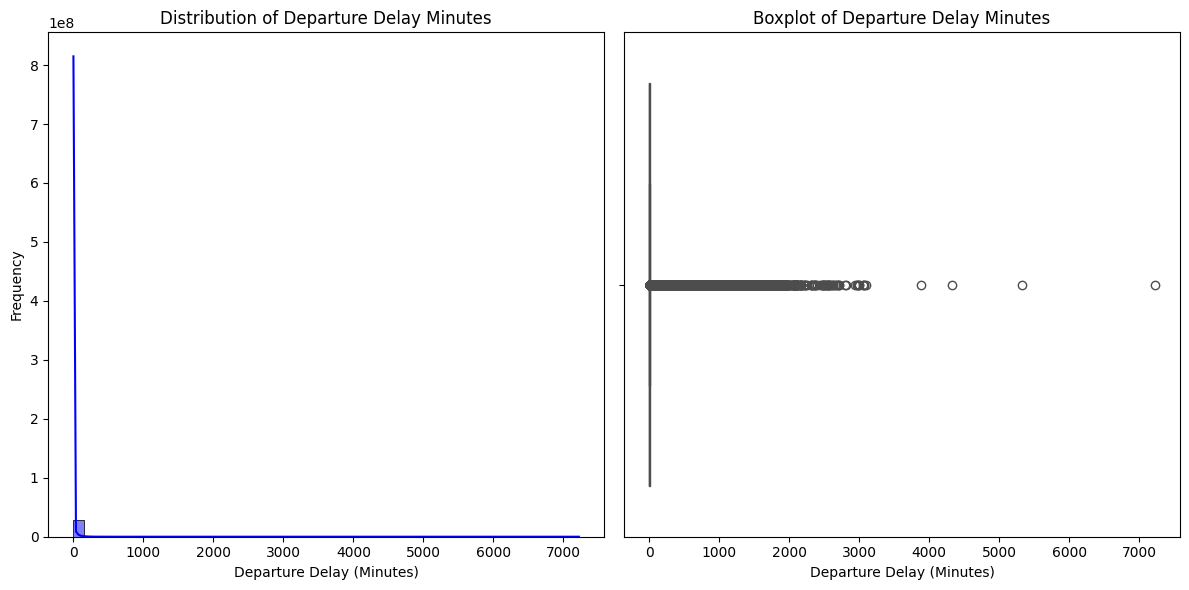

In [8]:
# Departure Delays Full
plt.figure(figsize=(12, 6))

# Histogram of DepDelayMinutes
plt.subplot(1, 2, 1)
sns.histplot(df['DepDelayMinutes'], bins=50, kde=True, color='blue')
plt.title('Distribution of Departure Delay Minutes')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')

# Boxplot of DepDelayMinutes
plt.subplot(1, 2, 2)
sns.boxplot(x=df['DepDelayMinutes'], color='orange')
plt.title('Boxplot of Departure Delay Minutes')
plt.xlabel('Departure Delay (Minutes)')

plt.tight_layout()
plt.show()

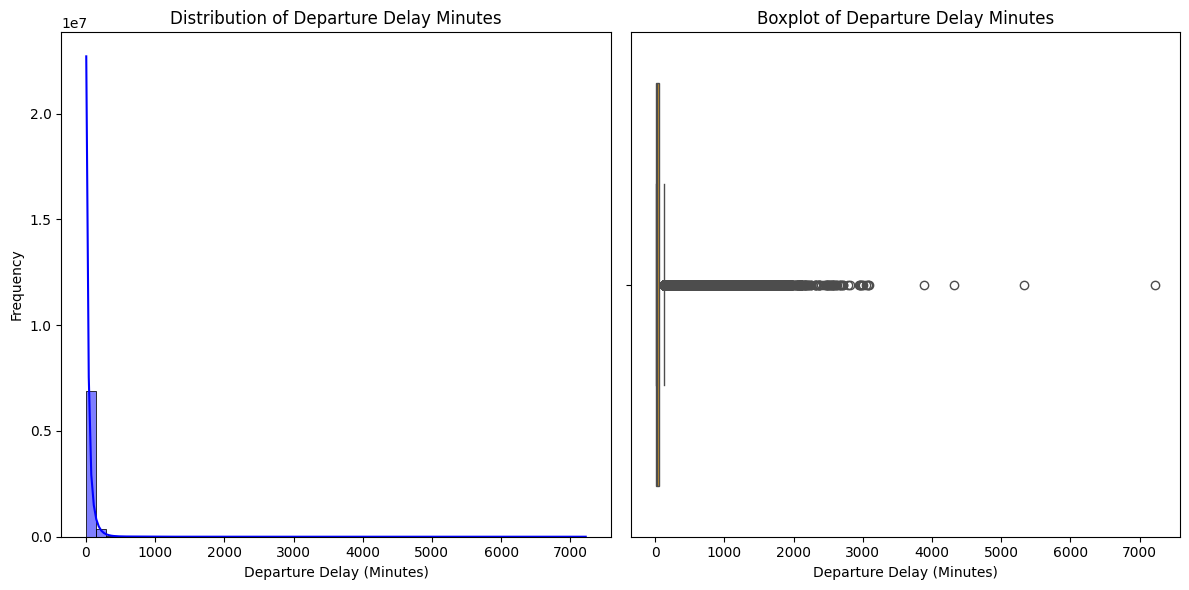

In [13]:
# Departure Delays beyond 75% Quartile
plt.figure(figsize=(12, 6))

# Histogram of DepDelayMinutes
plt.subplot(1, 2, 1)
sns.histplot(df[df['DepDelayMinutes'] >= 5.0]['DepDelayMinutes'], bins=50, kde=True, color='blue')
plt.title('Distribution of Departure Delay Minutes')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')

# Boxplot of DepDelayMinutes
plt.subplot(1, 2, 2)
sns.boxplot(x=df[df['DepDelayMinutes'] >= 5.0]['DepDelayMinutes'], color='orange')
plt.title('Boxplot of Departure Delay Minutes')
plt.xlabel('Departure Delay (Minutes)')

plt.tight_layout()
plt.show()

In [29]:
df['On Time'] = df['DepDelayMinutes'].apply(lambda x: True if x <= 15.0 else False)

### Departue Delays by Airlines ###

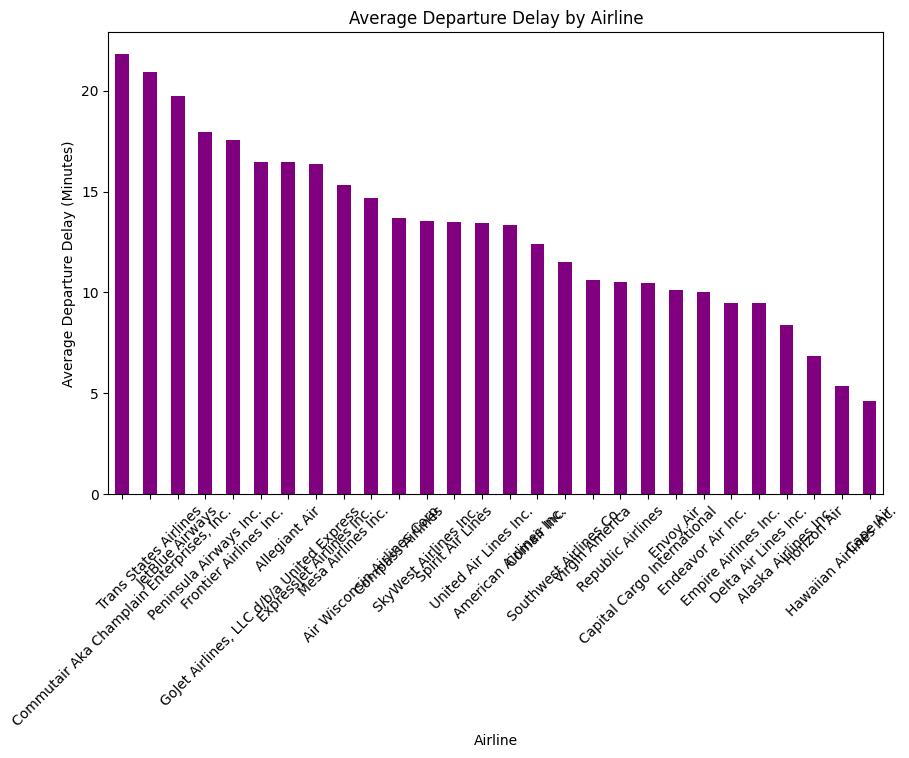

In [9]:
# Group by Airline and calculate mean DepDelayMinutes
airline_delay = df.groupby('Airline')['DepDelayMinutes'].mean().sort_values(ascending=False)

# Plot the average departure delay by airline
plt.figure(figsize=(10, 6))
airline_delay.plot(kind='bar', color='purple')
plt.title('Average Departure Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Departure Delay (Minutes)')
plt.xticks(rotation=45)
plt.show()

                        Airline  On Time Percentage
4                      Cape Air           93.738712
16       Hawaiian Airlines Inc.           91.666184
11            Endeavor Air Inc.           88.450889
17                  Horizon Air           88.373416
9          Delta Air Lines Inc.           87.722179
21            Republic Airlines           86.855381
5   Capital Cargo International           86.761596
10         Empire Airlines Inc.           86.739901
1          Alaska Airlines Inc.           86.560796
12                    Envoy Air           86.199847


C:\Users\yinki\AppData\Local\Temp\ipykernel_4008\967874636.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='On Time Percentage', y='Airline', data=on_time_percentage, palette='viridis')


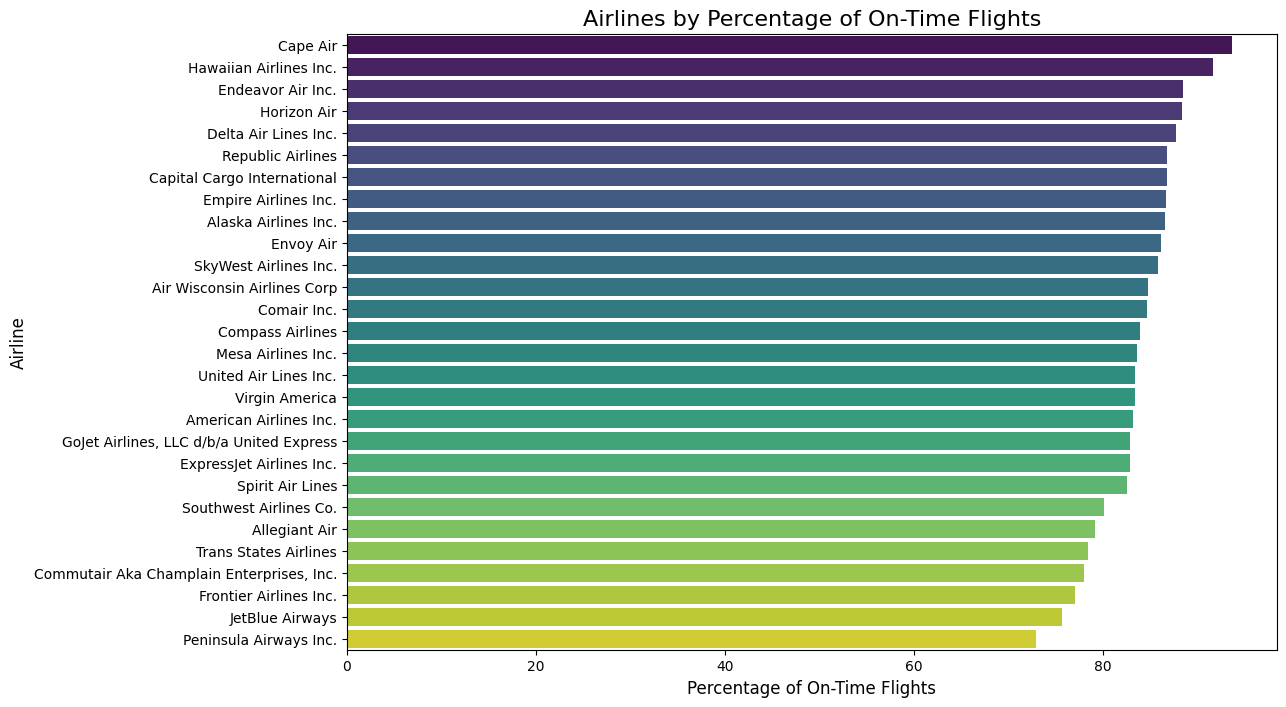

In [36]:
# Group by Airline and calculate the percentage of "On Time" flights
on_time_percentage = df.groupby('Airline')['On Time'].mean() * 100

on_time_percentage = on_time_percentage.reset_index()
on_time_percentage.columns = ['Airline', 'On Time Percentage']
on_time_percentage = on_time_percentage.sort_values(by='On Time Percentage', ascending=False)

print(on_time_percentage.head(10))

# Set up the figure
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='On Time Percentage', y='Airline', data=on_time_percentage, palette='viridis')

# Add labels and title
plt.title('Airlines by Percentage of On-Time Flights', fontsize=16)
plt.xlabel('Percentage of On-Time Flights', fontsize=12)
plt.ylabel('Airline', fontsize=12)

# Show the plot
plt.show()

### Departure Delays by Airports ###

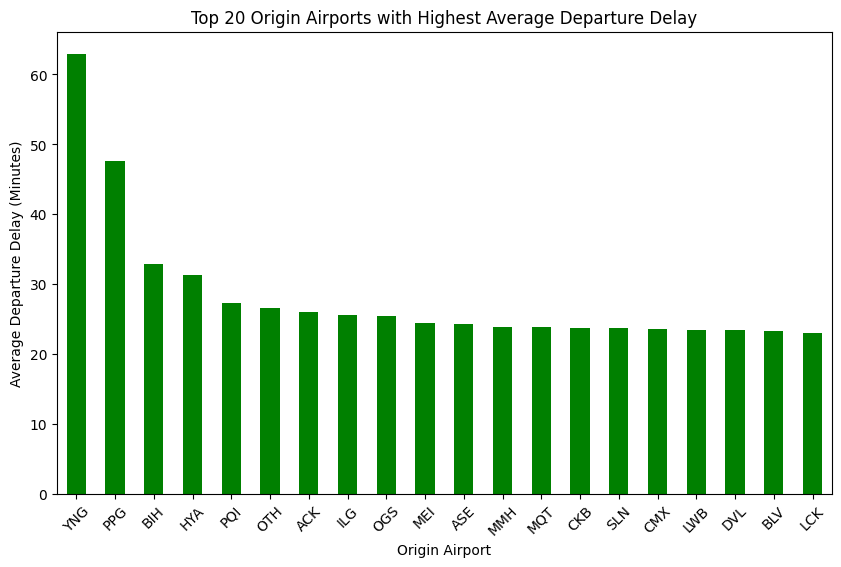

In [26]:
# Group by Origin Airport and calculate mean DepDelayMinutes
origin_delay = df.groupby('Origin')['DepDelayMinutes'].mean().sort_values(ascending=False).head(20)

# Plot the average departure delay by origin airport
plt.figure(figsize=(10, 6))
origin_delay.plot(kind='bar', color='green')
plt.title('Top 20 Origin Airports with Highest Average Departure Delay')
plt.xlabel('Origin Airport')
plt.ylabel('Average Departure Delay (Minutes)')
plt.xticks(rotation=45)
plt.show()



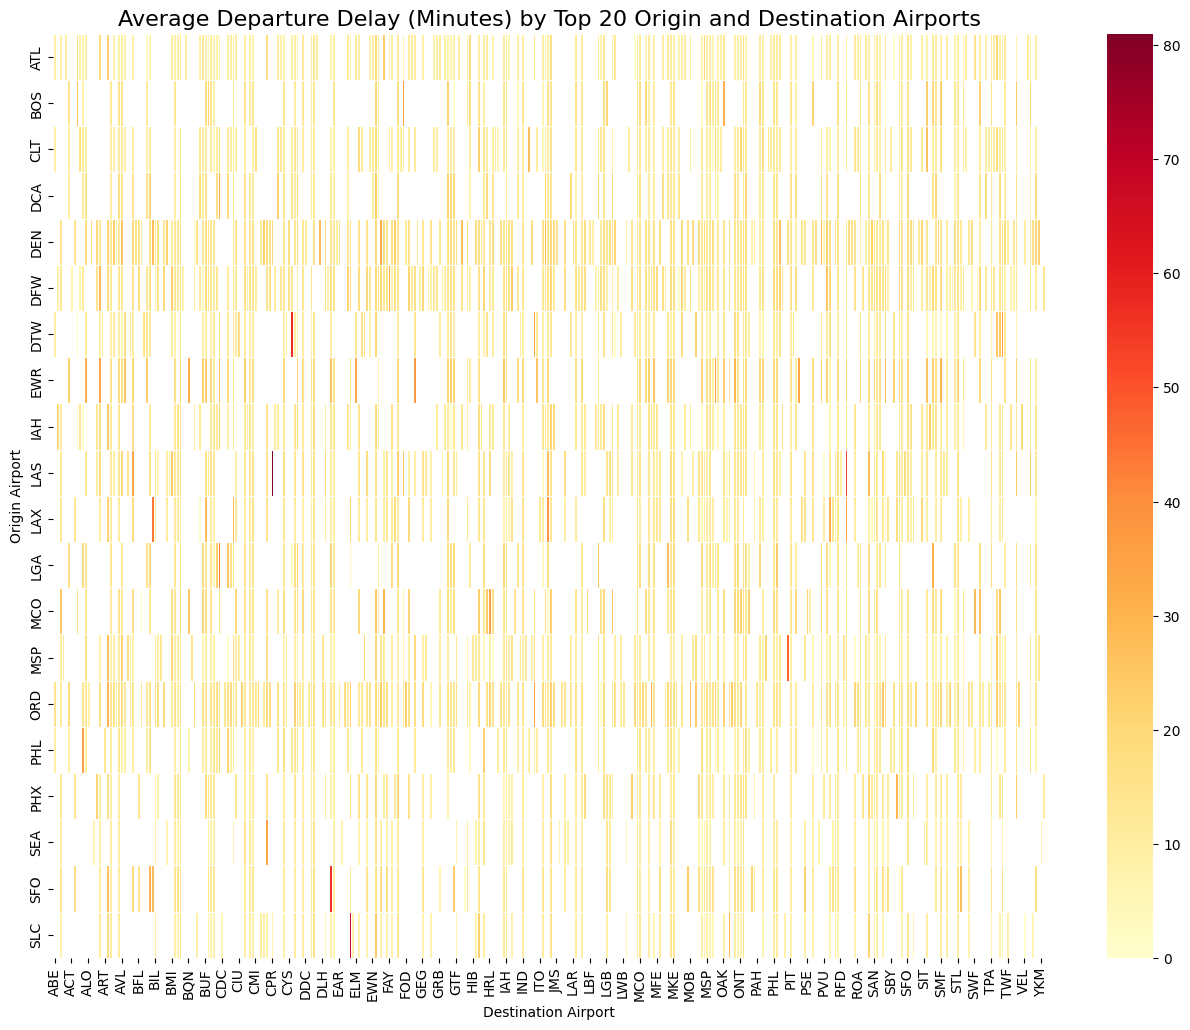

In [27]:
# Get the top 20 origin airports by flight count
top_origins = df['Origin'].value_counts().nlargest(20).index

# Filter the dataset for these top origins
filtered_df = df[df['Origin'].isin(top_origins)]

# Create a pivot table for the filtered data
heatmap_data = filtered_df.pivot_table(index='Origin', columns='Dest', values='DepDelayMinutes', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, linewidths=0.5)
plt.title('Average Departure Delay (Minutes) by Top 20 Origin and Destination Airports', fontsize=16)
plt.xlabel('Destination Airport')
plt.ylabel('Origin Airport')
plt.show()

In [31]:
## Percentage of Origin Airport 'On Time' barplot

# Group by Origin and calculate the percentage of "On Time" flights
on_time_percentage = df.groupby('Origin')['On Time'].mean() * 100

# Reset index to convert the result into a DataFrame
on_time_percentage = on_time_percentage.reset_index()

# Rename columns for clarity
on_time_percentage.columns = ['Origin', 'On Time Percentage']

# Sort by percentage for better visualization
on_time_percentage = on_time_percentage.sort_values(by='On Time Percentage', ascending=False)

# Display the top 10 airports
print(on_time_percentage.head(10))



    Origin  On Time Percentage
314    ROP           97.350993
116    EKO           94.693878
187    ITO           93.992371
284    PIH           93.580446
221    LWS           93.400771
192    JHM           93.176698
56     BTM           92.952030
326    SCC           92.947020
66     CDC           92.675030
153    GST           92.436975


C:\Users\yinki\AppData\Local\Temp\ipykernel_4008\192668585.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='On Time Percentage', y='Origin', data=on_time_percentage, palette='viridis')


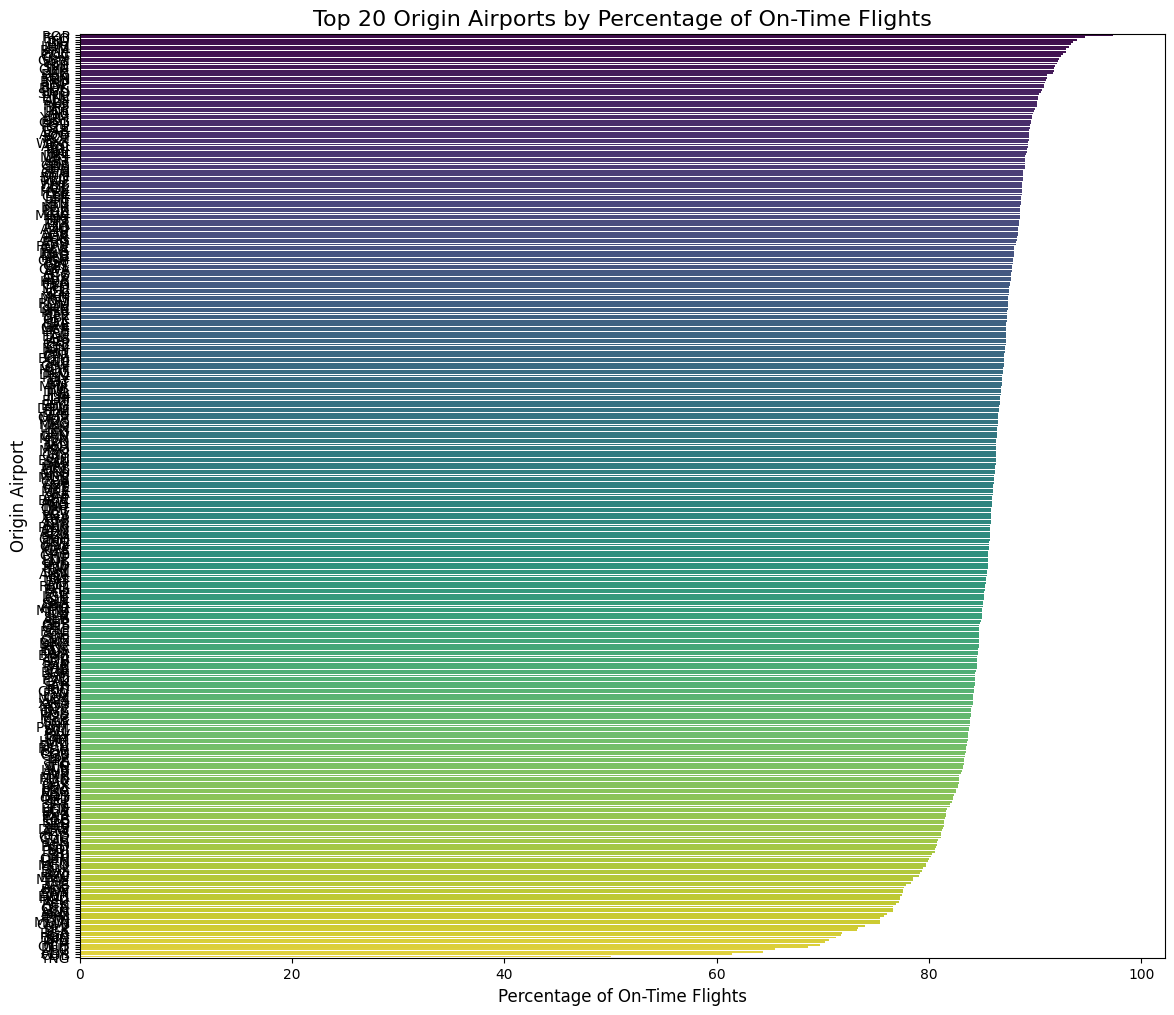

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(14, 12))

# Create the bar plot
sns.barplot(x='On Time Percentage', y='Origin', data=on_time_percentage, palette='viridis')

# Add labels and title
plt.title('Top 20 Origin Airports by Percentage of On-Time Flights', fontsize=16)
plt.xlabel('Percentage of On-Time Flights', fontsize=12)
plt.ylabel('Origin Airport', fontsize=12)

# Show the plot
plt.show()

In [21]:
heatmap_data

Origin  Dest
ABE     ATL       9.903822
        BNA      22.832700
        CLT      11.534578
        DTW      13.994228
        FLL      31.555911
                   ...    
YKM     SEA       7.649575
YNG     PIE     111.000000
        SFB      15.000000
YUM     DFW      18.497614
        PHX      11.101128
Name: DepDelayMinutes, Length: 8268, dtype: float64

### Departure Delays by Time ###

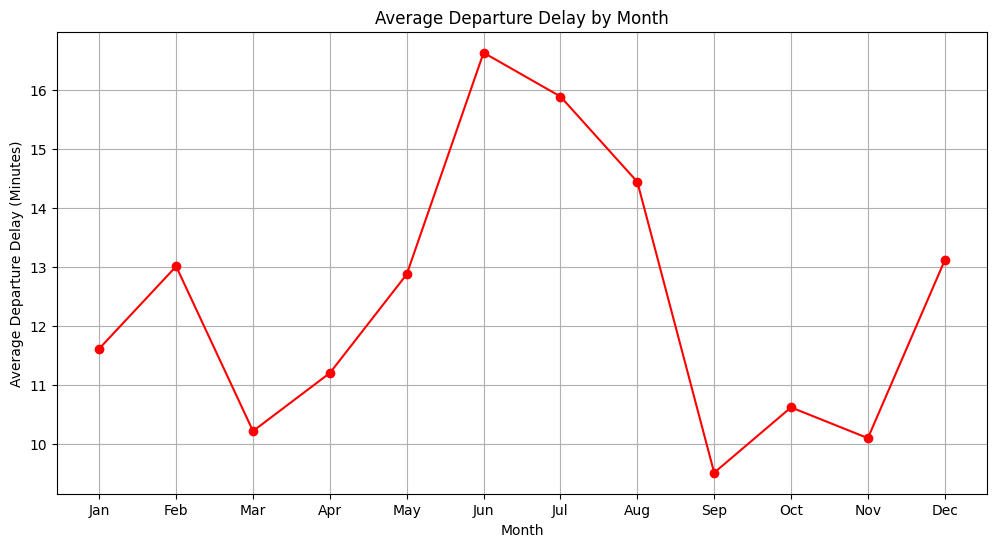

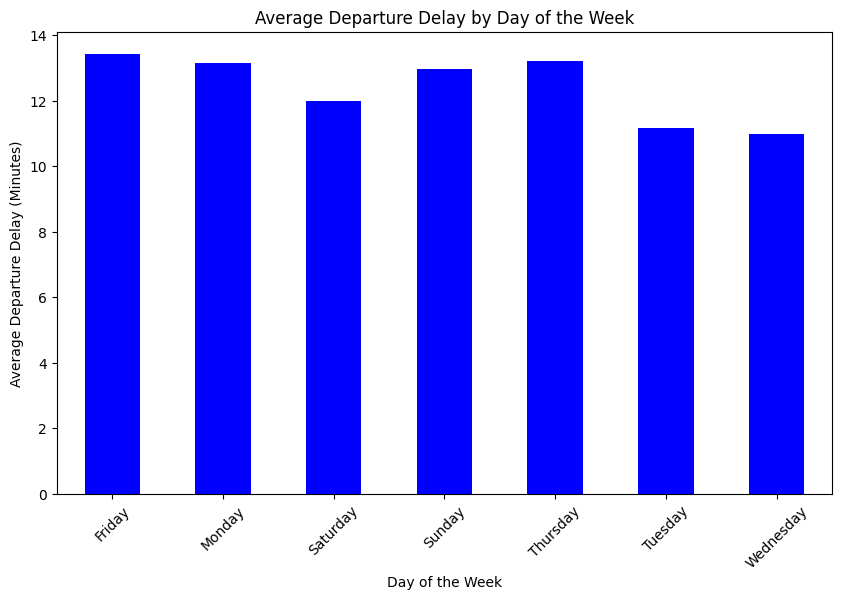

In [11]:
# Convert FlightDate to datetime
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Extract month and day of the week
df['Month'] = df['FlightDate'].dt.month
df['DayOfWeek'] = df['FlightDate'].dt.day_name()

# Group by Month and calculate mean DepDelayMinutes
monthly_delay = df.groupby('Month')['DepDelayMinutes'].mean()

# Group by Day of the Week and calculate mean DepDelayMinutes
day_of_week_delay = df.groupby('DayOfWeek')['DepDelayMinutes'].mean()

# Plot average departure delay by month
plt.figure(figsize=(12, 6))
monthly_delay.plot(kind='line', marker='o', color='red')
plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (Minutes)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Plot average departure delay by day of the week
plt.figure(figsize=(10, 6))
day_of_week_delay.plot(kind='bar', color='blue')
plt.title('Average Departure Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Departure Delay (Minutes)')
plt.xticks(rotation=45)
plt.show()

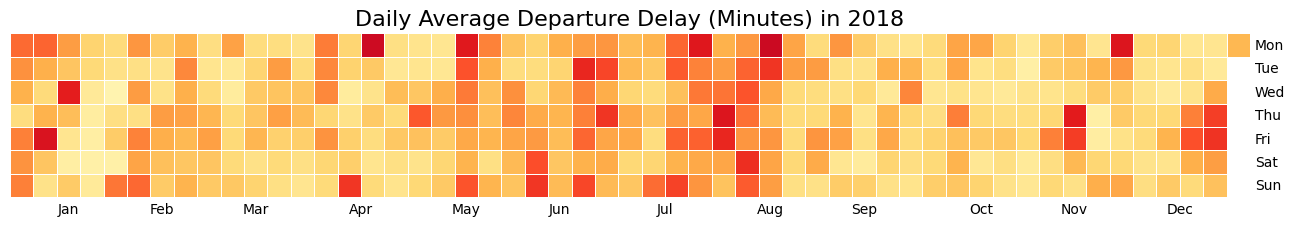

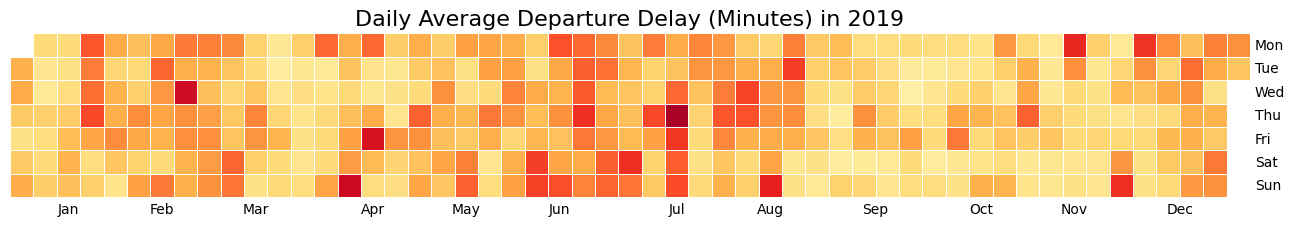

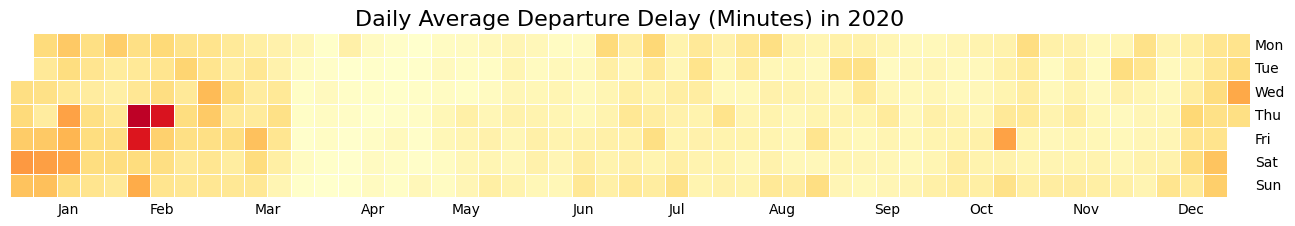

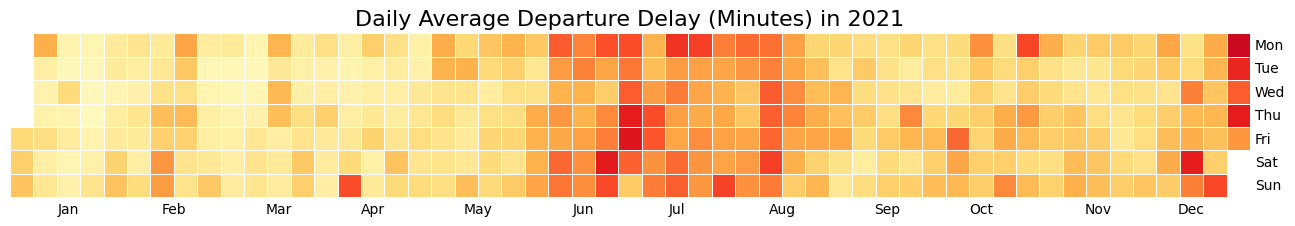

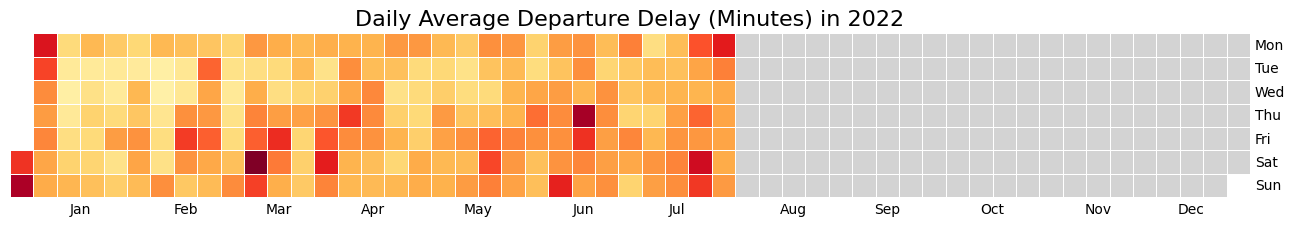

In [ ]:
# Using Calmap
import calmap

df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Group by FlightDate and calculate the mean DepDelayMinutes
daily_delay = df.groupby('FlightDate')['DepDelayMinutes'].mean()

# Convert to a time series
daily_delay = daily_delay.asfreq('D')  # Ensure all days are included

# Plot the calendar heatmap
for year in [2018, 2019, 2020, 2021, 2022]:
    plt.figure(figsize=(16, 10))
    calmap.yearplot(daily_delay, year=year, cmap='YlOrRd', fillcolor='lightgray', linewidth=0.5)
    plt.title(f'Daily Average Departure Delay (Minutes) in {year}', fontsize=16)
    plt.show()